In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.metrics import cohen_kappa_score,confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.metrics import cohen_kappa_score,confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,StackingClassifier,VotingClassifier

from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
# For Voting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.metrics import cohen_kappa_score,confusion_matrix
from imblearn.over_sampling import SMOTE

# visulize in loop
categorical_columns = df.select_dtypes(include='object').columns

# Set the number of columns per row in the grid
columns_per_row = 2

# Calculate the number of rows needed
num_rows = (len(categorical_columns) + columns_per_row - 1) // columns_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 4 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each categorical column and create count plots
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Count plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()





# hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Create the model
model = RandomForestClassifier()

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)





#
from sklearn.ensemble import VotingClassifier

# Example: Create a voting classifier
model1 = RandomForestClassifier()
model2 = LogisticRegression()

ensemble_model = VotingClassifier(estimators=[('rf', model1), ('lr', model2)], voting='hard')
ensemble_model.fit(X_train, y_train

                   
#
from sklearn.ensemble import VotingClassifier

# Example: Create a voting classifier
model1 = RandomForestClassifier()
model2 = LogisticRegression()

ensemble_model = VotingClassifier(estimators=[('rf', model1), ('lr', model2)], voting='hard')
ensemble_model.fit(X_train, y_train)
                   

                   
                   
                   
#
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy
mean_accuracy = np.mean(cv_scores)
                   
                   
                   
# smote
# Balance the data
os = SMOTE(sampling_strategy=0.6,)
xtrain_os,ytrain_os = os.fit_resample(xtrain,ytrain)
ytrain_os.value_counts()
    
                   

# def function to apply different model with one fuction
def model_validation(model,trainx,trainy,testx,testy):
    m = model
    m.fit(trainx,trainy)
    ypred = m.predict(testx)
    print('Confusion Matrix:\n',confusion_matrix(testy,ypred))
    print('Classification Report:\n',classification_report(testy,ypred))
    print('Cohen Kappa Score:\n',cohen_kappa_score(testy,ypred))
                   
                   


# Random Forest

model_validation(RandomForestClassifier(n_estimators=200,max_depth=5),xtrain_os,ytrain_os,xtest,ytest)
                   

# Bagging With Naive Bayes
model_validation(BaggingClassifier(base_estimator=GaussianNB(),n_estimators=200),xtrain_os,ytrain_os,xtest,ytest)
                   

# Boosting
model_validation(GradientBoostingClassifier(n_estimators=200,max_depth=5),xtrain_os,ytrain_os,xtest,ytest)
# AdaBoost
model_validation(AdaBoostClassifier(n_estimators=200),xtrain_os,ytrain_os,xtest,ytest)
model_validation(XGBClassifier(n_estimators=150,gamma=2),xtrain_os,ytrain_os,xtest,ytest)
                   

# Voting Classifier
base_estimators = [('Logistic Regression',LogisticRegression()),('Naive Bayes',GaussianNB()),
                   ('Decision Tree',DecisionTreeClassifier(max_depth=5)),('KNN',KNeighborsClassifier(n_neighbors=7))]
model_validation(VotingClassifier(base_estimators),xtrain_os,ytrain_os,xtest,ytest)
                   
                   
# Staking
base_estimators = [('Naive Bayes',GaussianNB()),('Decision Tree',DecisionTreeClassifier(max_depth=5)),
                   ('KNN',KNeighborsClassifier(n_neighbors=7)),
                   ('Random Forest',RandomForestClassifier(n_estimators=200,max_depth=5))]
model_validation(StackingClassifier(estimators=base_estimators),xtrain_os,ytrain_os,xtest,ytest)
model_validation(StackingClassifier(estimators=base_estimators,final_estimator=DecisionTreeClassifier(max_depth=3)),
                 xtrain_os,ytrain_os,xtest,ytest)
                   


# Assuming 'df' is your DataFrame
# Replace 'column_name' with the actual column where you want to handle outliers

# Visualize the data to identify outliers
plt.figure(figsize=(8, 6))
plt.scatter(df['column_name'], df['target_column'])
plt.title('Scatter plot before outlier treatment')
plt.xlabel('Column with outliers')
plt.ylabel('Target column')
plt.show()

# Identify outliers using statistical methods like IQR (Interquartile Range)
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['column_name'] > lower_bound) & (df['column_name'] < upper_bound)]

# Visualize the data after outlier treatment
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['column_name'], df_filtered['target_column'])
plt.title('Scatter plot after outlier treatment')
plt.xlabel('Column without outliers')
plt.ylabel('Target column')
plt.show()

# to see the percent of cdata missing
data['Family'].value_counts(normalize=True)*100
                   



# 3 b) outliers
for i in num_col:
    plt.figure(figsize=(10,1)) 
    sns.boxplot(x=i,data=data) 
    plt.title(f'Boxplot of Value by {num_col}') 
    plt.show() 
                   
                   
# cat vs cat plot
for i in cat_col:
    plt.figure(figsize=(4,2))
    sns.countplot(x=i, hue='Personal Loan', data=data)
    plt.title(f'Bar Plot for {i} vs. Personal Loan')
    plt.show()
                   
                   
#
x= df.drop(columns=['Personal Loan'])
y= df['Personal Loan']

                   
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=100)
logreg= LogisticRegression()
                   
logreg.fit(xtrain,ytrain)
                   
                   
ypred= logreg.predict(xtest)
                   
                   
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy:' ,metrics.accuracy_score(ytest, ypred))
print('Recall:' ,metrics.recall_score(ytest, ypred, zero_division=1))
print('Precision:',metrics.precision_score(ytest, ypred, zero_division=1))
print('CL Report',metrics.classification_report(ytest, ypred, zero_division=1))
                   
                   
print('cohan kappa score:', cohen_kappa_score(ytest, ypred))

In [2]:
data= pd.read_excel('Bank_Personal_Loan_Modelling-1 (1).xlsx',1)

In [3]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
data['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [5]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [6]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [7]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [8]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [9]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [10]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
data['Family'].value_counts(normalize=True)*100

1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

In [13]:
data['Education'].value_counts(normalize=True)*100

1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

In [14]:
data['CD Account'].value_counts(normalize=True)*100

0    93.96
1     6.04
Name: CD Account, dtype: float64

In [15]:
data['Securities Account'].value_counts(normalize=True)*100

0    89.56
1    10.44
Name: Securities Account, dtype: float64

In [16]:
data['CreditCard'].value_counts(normalize=True)*100

0    70.6
1    29.4
Name: CreditCard, dtype: float64

In [17]:
data['Online'].value_counts(normalize=True)*100

1    59.68
0    40.32
Name: Online, dtype: float64

In [18]:
# 3 a) missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [19]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [20]:
cat_col= [ 'Family',
       'Education', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],

In [21]:
num_col=[ 'Age', 'Experience', 'Income','CCAvg','Mortgage']

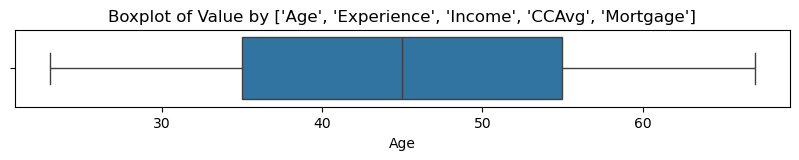

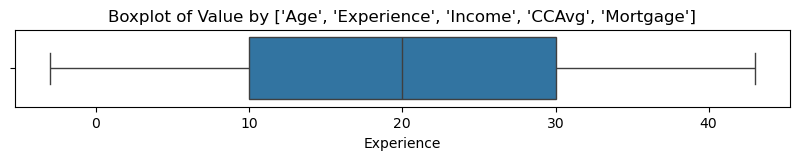

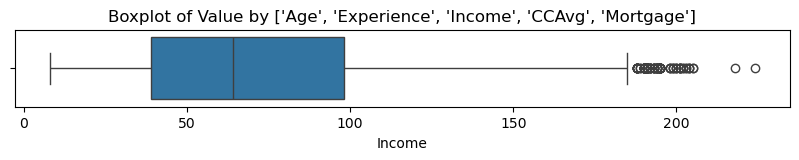

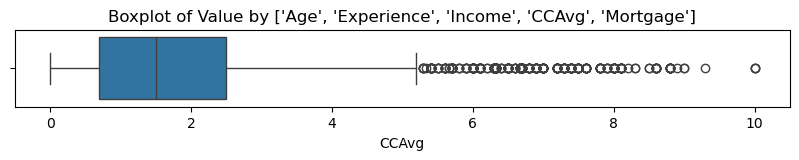

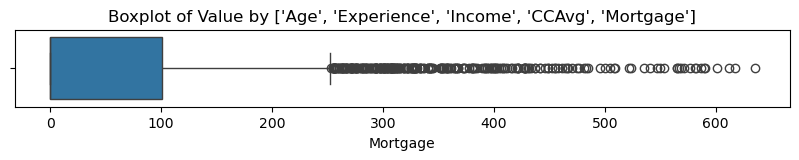

In [23]:
# 3 b) outliers
for i in num_col:
    plt.figure(figsize=(10,1)) 
    sns.boxplot(x=i,data=data) 
    plt.title(f'Boxplot of Value by {num_col}') 
    plt.show() 

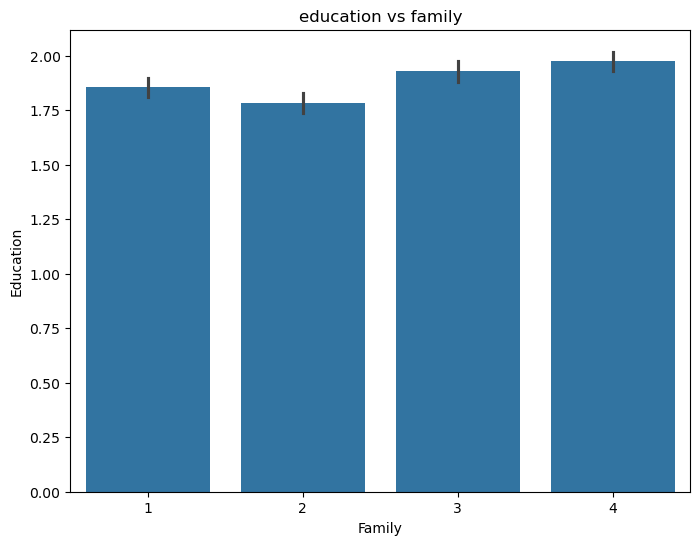

In [24]:
# categorial plots
plt.figure(figsize=(8, 6))
sns.barplot(x='Family', y='Education', data=data)
plt.title('education vs family')
plt.show()

In [25]:
cat_col= data['Family'],data['Education'],data['Securities Account'],data['CD Account'],data['Online'],data['CreditCard']

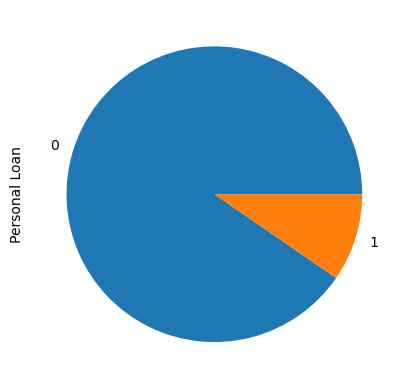

In [26]:
data['Personal Loan'].value_counts(normalize=True).plot(kind='pie')
plt.show()

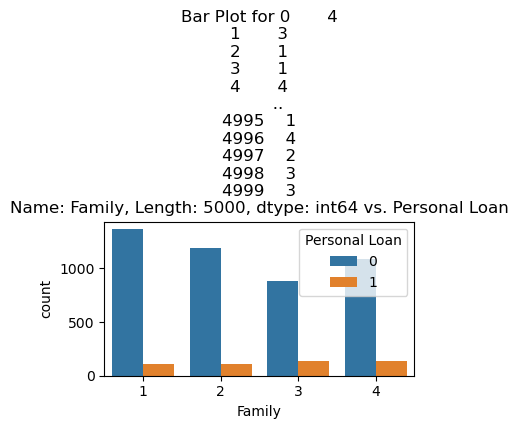

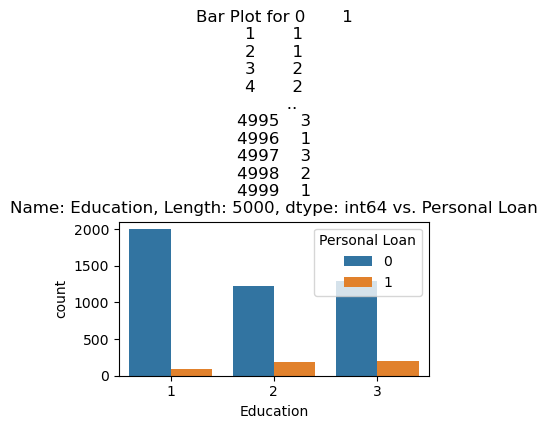

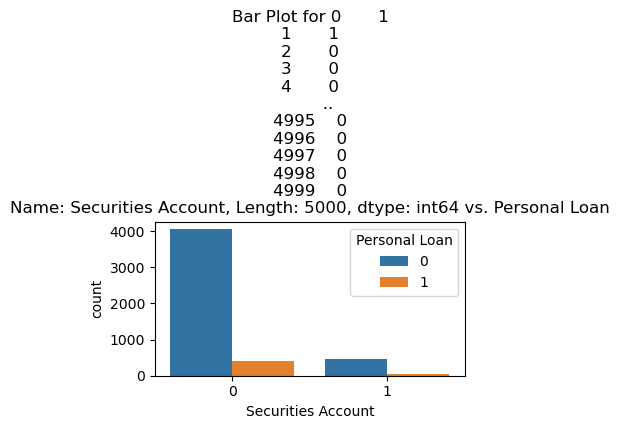

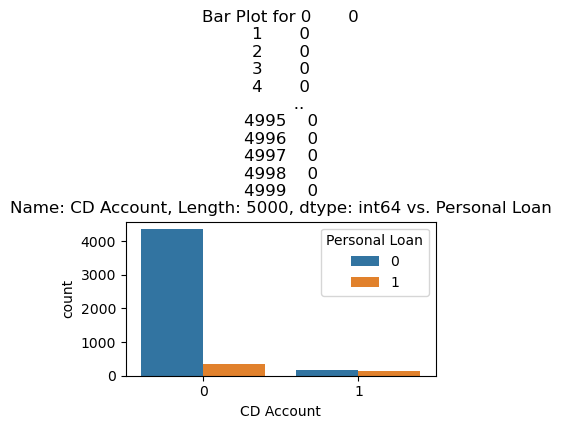

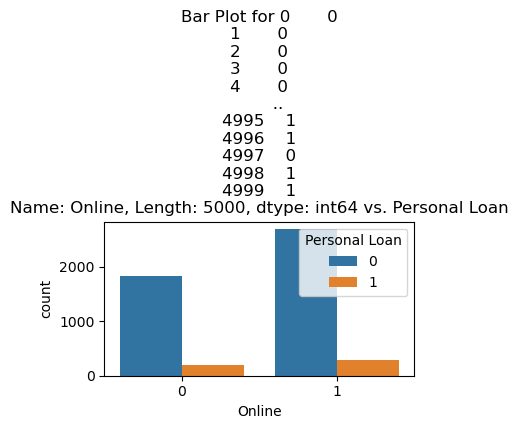

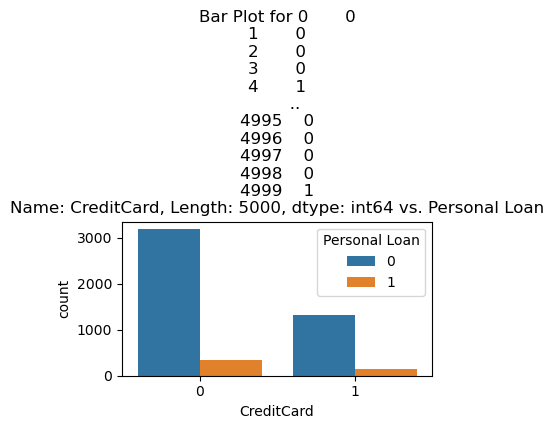

In [27]:
for i in cat_col:
    plt.figure(figsize=(4,2))
    sns.countplot(x=i, hue='Personal Loan', data=data)
    plt.title(f'Bar Plot for {i} vs. Personal Loan')
    plt.show()

In [28]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<Axes: >

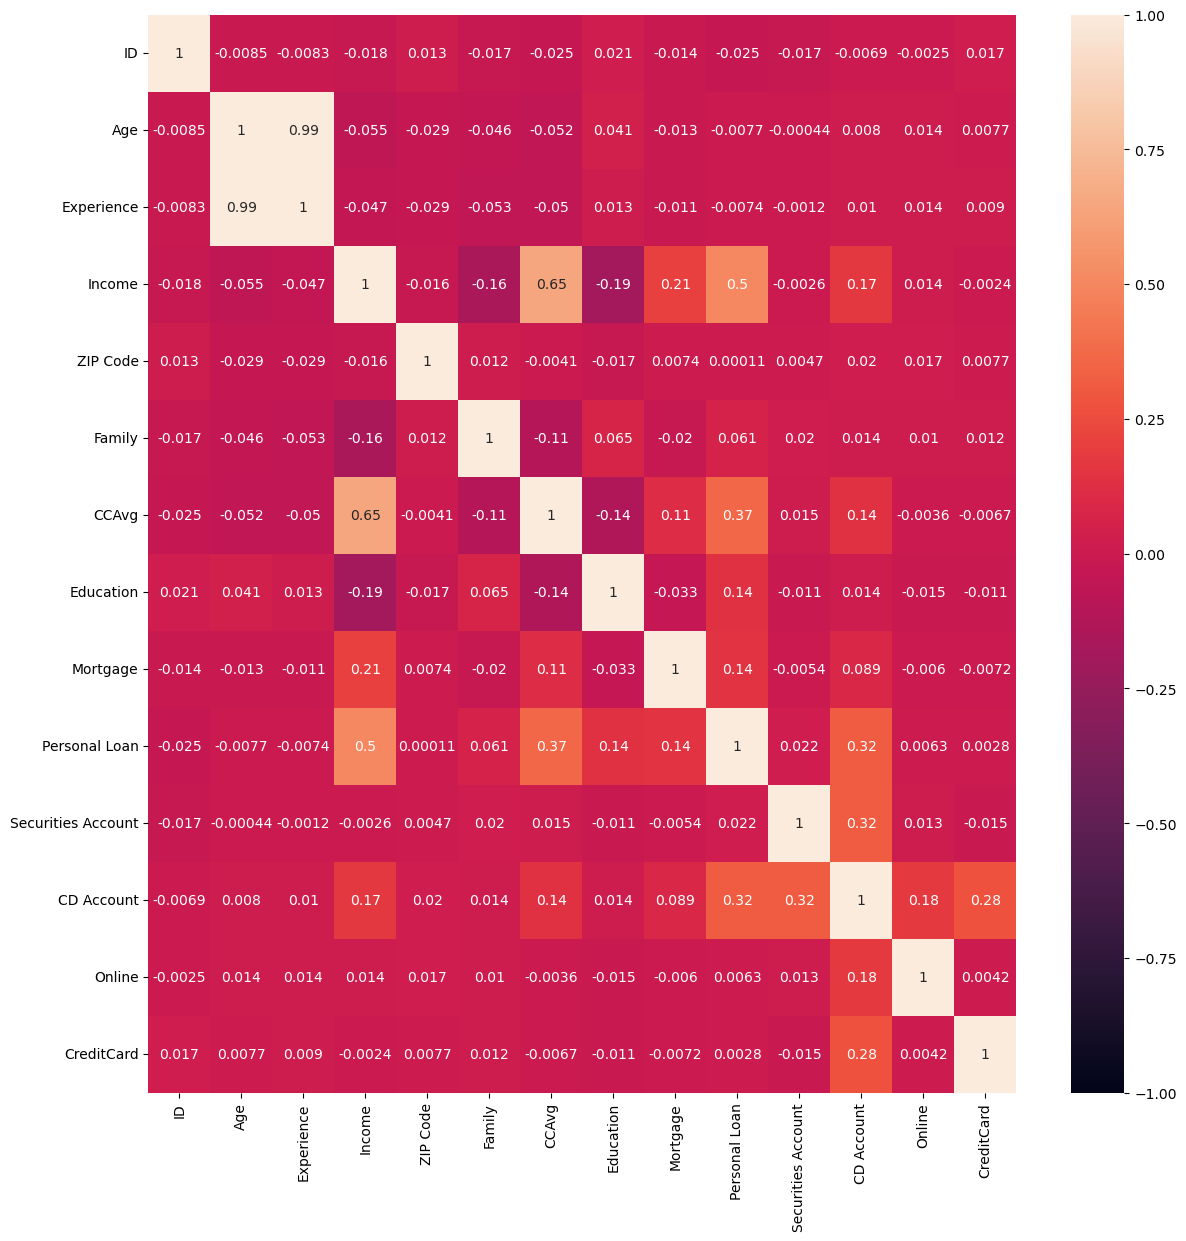

In [34]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)

In [35]:
df=data.copy()

In [36]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [37]:
df=df.drop(columns=['ID'])

In [38]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


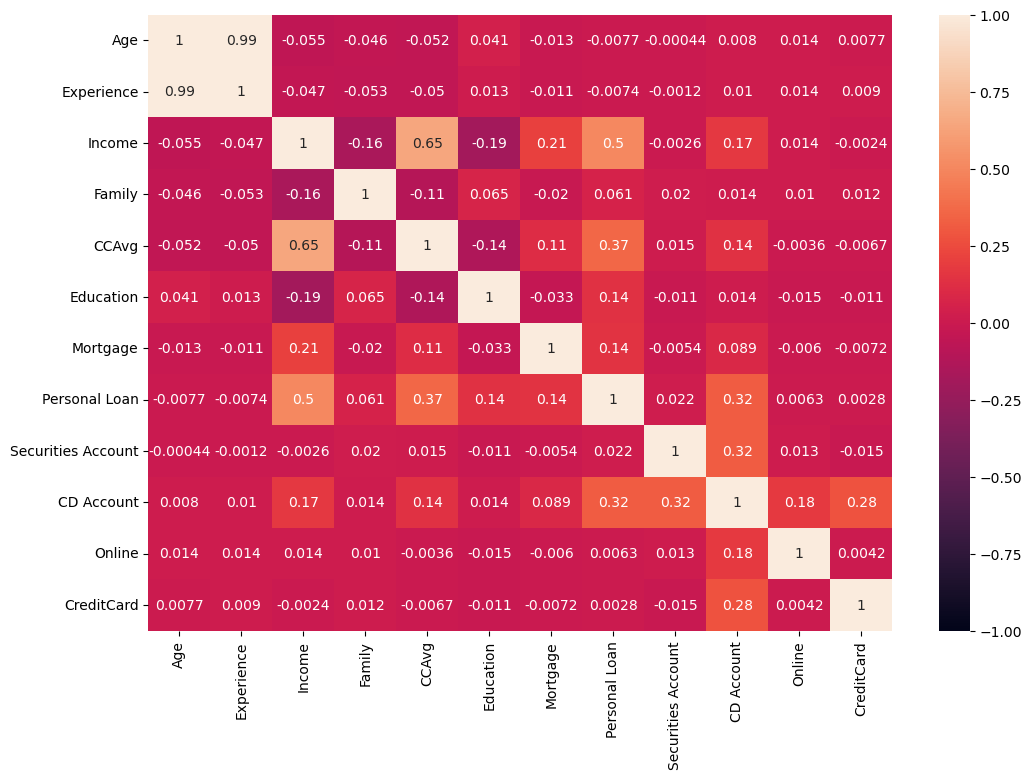

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [41]:
df=df.drop(columns=['ZIP Code'])

In [42]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [47]:
df= df.drop(columns=['Age','Experience','Online','CreditCard'])

In [48]:
df

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,49,4,1.6,1,0,0,1,0
1,34,3,1.5,1,0,0,1,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,0
4996,15,4,0.4,1,85,0,0,0
4997,24,2,0.3,3,0,0,0,0
4998,49,3,0.5,2,0,0,0,0


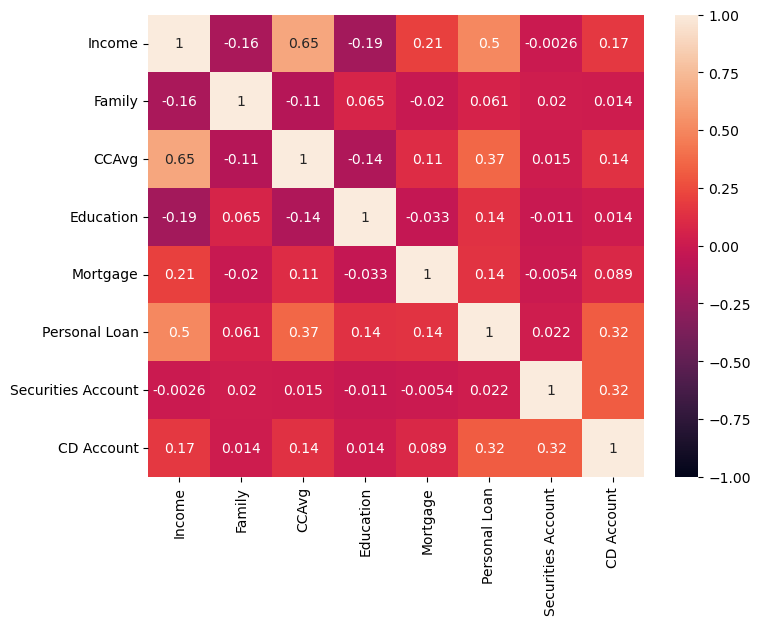

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [52]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [53]:
x= df.drop(columns=['Personal Loan'])
y= df['Personal Loan']

In [54]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.4,random_state=100)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg= LogisticRegression()

In [57]:
logreg.fit(xtrain,ytrain)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
ypred= logreg.predict(xtest)

In [59]:
ypred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [61]:
print(xtest)
print(ypred)

      Income  Family     CCAvg  Education  Mortgage  Securities Account  \
789       31       4  0.300000          2         0                   0   
2507      60       4  2.100000          1       234                   0   
2376      23       3  0.200000          1         0                   0   
1378      34       4  0.100000          3         0                   0   
598       11       2  0.200000          3        90                   0   
...      ...     ...       ...        ...       ...                 ...   
679      103       3  1.800000          2       364                   0   
4072      78       1  1.000000          3         0                   0   
160      134       4  6.500000          3         0                   0   
1767      74       3  2.333333          2         0                   0   
2904     190       3  2.200000          1         0                   0   

      CD Account  
789            0  
2507           0  
2376           0  
1378           0  
598 

In [64]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy:' ,metrics.accuracy_score(ytest, ypred))
print('Recall:' ,metrics.recall_score(ytest, ypred, zero_division=1))
print('Precision:',metrics.precision_score(ytest, ypred, zero_division=1))
print('CL Report',metrics.classification_report(ytest, ypred, zero_division=1))

Accuracy: 0.944
Recall: 0.5769230769230769
Precision: 0.8333333333333334
CL Report               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1792
           1       0.83      0.58      0.68       208

    accuracy                           0.94      2000
   macro avg       0.89      0.78      0.83      2000
weighted avg       0.94      0.94      0.94      2000



In [71]:
xtrain.shape

(3000, 7)

In [73]:
print('cohan kappa score:', cohen_kappa_score(ytest, ypred))

cohan kappa score: 0.6522257551669317


In [74]:
from xgboost import XGBClassifier